In [8]:
from loaddata import *
import numpy as np

import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score 

import matplotlib.pyplot as plt

In [6]:
df

,Subject ID,ADM to Rx start,AKI BASE,AKI D7,ALB,ALP,ALT,AMYLASE,AST v1,AST,Age,BACT INF,BASE ABX IV 5D,BASE BLEED TEXT,BASE GIB ALL,BASE PPI,BASE RF CRF,BASE SEPSIS,BASE VARICEAL,BILI,BMI,BPM,CALCIUM,CHEST INF,CREAT,CRP mgl,CULTURE POS,D14 GIB CUMU,D14 INF CUMU,D14 INF TIME,D21 GIB CUMU,D21 INF CUMU,D21 INF TIME,D28 GIB CUMU,D28 INF CUMU,D28 INF TIME,D28 MRIS,D365 MRIS,D7 GIB CUMU,D7 INF TIME,D90 GIB CUMU,D90 INF CUMU,D90 INF TIME,D90 MRIS,DAYS TO GIB,DBP,DF,DRINK 1,Date of death,Date of transplantation,Day 0,Day 14,Day 21,Day 28,Day 7,Day 90,Ethnicity,Fail inclusion criteria,Ferritin ngml,GAHS,GEN 1,GEN 2,GEN 3,GEN 4,GIB,GLUCOSE,Gender,HB,HE BASE MERGE,HEIGHT,HPCT CONC,Hepcidin ngml,Histology,INCIDENT INFECTION ALL,INCIDENT INFECTION KM TIME 120,INCIDENT INFECTION KM TIME 28,INF EPISODES,INR,Infection 1,Infection 2,Infection 3,Infection 4,Infection 5,Iron ?moll,LILLE CAT,LILLE,Lung disease overall,MAX ALC,NEUT,NLR,NON VARICEAL GIB,ORG 1,ORG 2,ORG 3,ORG 4,PLTS,PO4,POTASSIUM,Pentoxifylline,Prednisolone,SAE INF ALL,SAE INF,SBP INF,SBP,SODIUM,SP 1,SP 2,SP 3,SP 4,Smoker cat base overall,TEMP,TIME ON STUDY FINAL,TIME TO 1ST INF,TOT PROT,TOTAL INF SITES,TSAT,Transferrin,UREA,URINE INF,VARICEAL GIB,WBC,WEIGHT,WHO PS BASE MERGE,bDNA,bx AHHS Balloon 1,bx AHHS Bilirubin 1,bx AHHS Fibrosis 1,bx AHHS Inflam 1,bx AHHS Mallory 1,bx AHHS Mega 1,bx AHHS PMN 1,bx AHHS Steatosis 1,bx LANEC Fibrosis 3,bx Summary 1,bx quality 0,bx reason,rs738409,sTfR mgl
0,1005010,8.0,0.0,0.0,44.0,79.0,28.0,-9.0,-9.0,75.0,47.2,0.0,1.0,No,0.0,1.0,0.0,0.0,0.0,95.0,17.024515,95.0,-9.00,1.0,35.0,8.4,1.0,1.0,1.0,13.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,1.0,60.0,0.0,3.0,60.0,47.415556,-99.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,White,0.0,704.1,6.0,Escherichia,NaN,NaN,NaN,1.0,-9.0,Female,96.0,0.0,158.0,167.322585,25.677,NaN,1.0,13.0,13.0,2.0,1.800000,Unknown,Chest,Urine,NaN,NaN,19.5,1.0,0.012597,0.0,53.0,2.6,3.3,0.0,Gram_negative_bacillus,NaN,NaN,NaN,50.0,-9.00,3.1,0.0,0.0,0.0,0.0,0.0,98.0,131.0,coli,NaN,NaN,NaN,Former,36.5,382.0,13.0,-9.0,3.0,78.0,99.0,1.8,1.0,1.0,3.6,42.5,3.0,2.477570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.81
1,1005009,5.0,0.0,0.0,16.0,203.0,27.0,-9.0,-9.0,NaN,40.5,0.0,1.0,No,0.0,0.0,0.0,0.0,0.0,245.0,25.951557,94.0,1.98,0.0,41.0,46.2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,90.0,0.0,90.0,63.0,58.027485,0.0,25/02/2013,NaN,0.0,0.0,0.0,0.0,0.0,1.0,White,0.0,184.5,7.0,NaN,NaN,NaN,NaN,1.0,4.4,Female,95.0,0.0,170.0,0.000000,2.143,NaN,1.0,90.0,28.0,1.0,1.778689,Unknown,NaN,NaN,NaN,NaN,21.3,0.0,0.699338,0.0,280.0,11.0,8.5,0.0,NaN,NaN,NaN,NaN,128.0,1.12,3.2,1.0,0.0,0.0,0.0,0.0,102.0,134.0,NaN,NaN,NaN,NaN,Current,37.5,514.0,90.0,61.0,1.0,74.4,114.0,1.1,0.0,0.0,13.6,75.0,1.0,6.279773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.76
2,1005008,2.0,0.0,1.0,22.0,92.0,84.0,-9.0,368.0,368.0,50.1,NaN,0.0,No,0.0,0.0,0.0,0.0,0.0,450.0,26.608560,99.0,2.13,NaN,52.0,37.2,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,NaN,0.0,91.0,80.0,93.475789,0.0,03/05/2014,NaN,0.0,0.0,0.0,0.0,0.0,0.0,White,0.0,1584.6,10.0,NaN,NaN,NaN,NaN,1.0,6.0,Male,130.0,0.0,168.0,0.000000,10.438,NaN,0.0,120.0,28.0,NaN,2.196721,NaN,NaN,NaN,NaN,NaN,19.5,0.0,0.958646,0.0,146.0,1.9,4.8,1.0,NaN,NaN,NaN,NaN,48.0,0.93,2.3,1.0,1.0,0.0,NaN,NaN,135.0,135.0,NaN,NaN,NaN,NaN,Former,37.0,982.0,NaN,56.0,NaN,95.1,81.0,2.0,NaN,0.0,2.9,75.1,1.0,7.341092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.16
3,1005007,3.0,0.0,0.0,24.0,154.0,89.0,-9.0,148.0,148.0,47.1,NaN,0.0,No,0.0,1.0,0.0,0.0,0.0,162.0,28.694648,108.0,1.96,NaN,39.0,37.2,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,60.0,31.093684,0.0,09/09/2013,NaN,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,987.6,6.0,NaN,NaN,NaN,NaN,0.0,7.6,Female,129.0,0.0,157.3,0.000000,26.001,NaN,0.0,120.0,28.0,NaN,1.385246,NaN,NaN,NaN,NaN,NaN,10.5,1.0,0.112224,0.0,378.0,10.5,NaN,0.0,NaN,NaN,NaN,NaN,206.0,0.86,3.9,0.0,0.0,0.0,NaN,NaN,100.0,125.0,NaN,NaN,NaN,NaN,-9,36.6,773.0,NaN,58.0,NaN,46.6,9

In [3]:
for x in stopah.columns:
    if len(stopah[stopah[x] == -2147483648].index) >0:
        print(x)
        ix = stopah[stopah[x] == -2147483648].index
        print(ix)
        #imp = round(stopah[[x]].loc[~stopah.index.isin(ix)].mean(),2)
        #stopah.loc[ix,x] = imp

#stopah.min() check for more 

Max.grams.of.alcohol.drunk.per.day..calc.
Index([ 64, 164, 217, 220, 341, 351, 355, 507, 525, 538, 556, 599, 687, 693,
       723, 839, 933, 964, 986, 987, 991],
      dtype='int64')
Hepatic.Encephalopathy...Merged
Index([   3,   12,  122,  168,  174,  180,  181,  188,  190,  194,  198,  210,
        215,  221,  226,  228,  229,  241,  267,  294,  298,  301,  311,  312,
        320,  333,  366,  595,  628,  632,  638,  641,  642,  651,  652,  765,
        769,  771,  846,  935,  939,  940,  993, 1005, 1006, 1027, 1040, 1052],
      dtype='int64')
Pulse...Merged
Index([25, 164, 294, 426, 602], dtype='int64')
Systolic.BP...Merged
Index([25, 164, 294, 426, 521, 602], dtype='int64')
Diastolic.BP...Merged
Index([25, 164, 294, 426, 521, 602], dtype='int64')
Hb...Merged
Index([164, 294, 521], dtype='int64')
Platelets...Merged
Index([122, 164, 294, 320, 335, 343, 785], dtype='int64')
Bilirubin.Merged
Index([294], dtype='int64')
ALT...Merged
Index([ 136,  164,  218,  224,  249,  250,  251,  253

In [3]:
# First crude Missing value management 

#Missing value management before train/test split. Controversial opinions, but I prefer the homogeneity


stopah['NLR_0'].isna().sum()/len(stopah) #remove, might be correlated to death or alive, but medical advice needed

stopah.drop(['NLR_0', 'bDNA'], axis=1, inplace=True) #same for 'bDNA'

baseline.remove('NLR_0')
baseline.remove('bDNA')

stopah[['Ferritin_ngml']].isna().sum()/len(stopah) #manageable amount 

baseline.remove('Ferritin_ngml')

In [4]:
imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_values = pd.DataFrame(imputer.fit_transform(stopah))

imputed_values.columns = stopah.columns

/home/jlm217/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jlm217/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jlm217/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jlm217/.local/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [5]:
mask = stopah.isna()

In [6]:
df_mice = stopah.mask(mask, imputed_values)

#df_mice.isna().sum().sum()

#sanity checks 

#df_mice.max() - stopah.max()
#df_mice.min() - stopah.min()
#df_mice.mean() - stopah.mean()

In [7]:
#not sure about 'PNPLA3_Add', 'PNPLA3_Rec', HPCT_NG, Hepatic.Encephalopathy...Merged

#categoricals and targets 

excluded = ['D28_DTH','D90_DTH','Prednisolone', 'Hepatic.Encephalopathy...Merged',
                                            'Baseline_sepsis','Baseline_GIB','Gender', 'HPCT_NG',
                                            'PNPLA3_Add', 'PNPLA3_Rec',
           'Max.grams.of.alcohol.drunk.per.day..calc.']

In [8]:
df_mice[df_mice.columns[~df_mice.columns.isin(excluded)]] =df_mice[df_mice.columns[~df_mice.columns.isin(excluded)]].apply(lambda x:np.log(x))

In [9]:
stopah = df_mice.copy()

In [10]:
#Split into train-test based on treatment 

train = stopah.loc[stopah['Prednisolone']==0].drop(['Prednisolone'], axis=1)

test= stopah.loc[stopah['Prednisolone']==1].drop(['Prednisolone'], axis=1)

train.reset_index()
test.reset_index()

,index,D28_DTH,D90_DTH,Gender,Baseline_sepsis,Baseline_GIB,Age.at.randomisation..calc.,Weight,Max.grams.of.alcohol.drunk.per.day..calc.,Hepatic.Encephalopathy...Merged,Temperature...Merged,Pulse...Merged,Systolic.BP...Merged,Diastolic.BP...Merged,MAP,Hb...Merged,Platelets...Merged,WBC...Merged,Neutrophils...Merged,INR...Merged.clinical.and.calc,Bilirubin.Merged,ALT...Merged,ALP...Merged,Albumin...Merged,Sodium...Merged,Potassium...Merged,Urea...Merged,Creatinine...Merged,Ferritin_ngml,Iron_mumoll,Transferrin,TSAT,PNPLA3_Add,PNPLA3_Rec,HPCT_NG
0,1,0,0,0,0,0,4.218036,4.290459,280.0,1.0,3.597312,4.488636,4.605170,4.174387,4.339467,4.795791,4.634729,2.667228,2.501436,0.327814,5.774552,4.836282,5.755742,2.944439,4.912655,1.098612,2.251292,4.234107,8.630165,2.856470,4.394449,4.437934,0.000000,0.000000,0.261571
1,4,0,0,0,0,0,3.627004,4.284965,291.0,0.0,3.602777,4.584967,4.795791,4.330733,4.510860,4.543295,5.093750,1.481605,1.131402,0.421726,4.983607,4.406719,4.828314,3.135494,4.905275,1.360977,0.000000,4.127134,7.513218,3.273364,4.812184,4.446174,2.000000,1.000000,0.204013
2,5,0,0,0,0,0,3.914021,4.318821,167.0,0.0,3.610918,4.595120,4.905275,4.382027,4.588363,4.867534,3.871201,1.064711,0.641854,0.786966,6.109248,4.430817,4.521789,3.091042,4.905275,0.832909,0.693147,3.951244,7.368087,2.970414,4.394449,4.554929,0.000000,0.000000,0.000000
3,11,0,0,0,0,0,3.983413,4.430817,217.0,0.0,3.597312,4.521789,4.828314,4.248495,4.481118,4.605170,4.762174,1.945910,1.568616,0.587787,5.247024,3.951244,5.187386,3.044522,4.927254,1.308333,1.589235,4.510860,6.658524,3.139833,4.905275,4.213608,1.000000,0.000000,0.113990
4,13,0,0,0,0,0,3.577948,4.453184,423.0,0.0,3.605498,4.624973,4.744932,4.094345,4.360973,4.672829,4.499810,2.066863,1.704748,0.955511,4.955827,3.218876,5.087596,3.258097,4.779123,1.223775,1.629241,4.564348,7.372432,2.557227,3.988984,4.552824,1.000000,0.000000,0.154660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1060,0,0,1,0,0,3.325036,4.143135,216.0,0.0,3.624341,4.682131,4.919981,4.330733,4.567814,4.691348,5.826000,2.839078,2.388763,0.693147,6.061457,3.091042,5.934894,3.258097,4.897840,0.916291,0.693147,3.637586,5.768633,2.923162,5.105945,3.790985,1.000000,0.000000,0.000000
530,1061,0,0,0,1,0,4.032469,4.449685,112.0,0.0,3.608212,4.304065,4.624973,4.189655,4.356709,4.605170,4.304065,1.504077,1.064711,0.470004,5.476464,3.555348,4.836282,3.610918,4.919981,1.335001,1.029619,4.060443,6.517819,2.873565,4.317488,4.532599,1.000000,0.000000,0.000000
531,1062,0,0,0,0,0,4.195697,4.364372,168.0,0.0,3.591818,4.718499,4.753590,4.382027,4.521789,4.820282,5.472271,2.302585,2.091864,0.470004,5.093750,3.526361,4.919981,3.367296,4.927254,1.252763,1.808289,3.951244,4.496471,2.128232,5.068904,3.058707,0.565484,0.072106,0.370702
532,1065,0,0,1,0,0,3.921973,4.284965,82.0,0.0,3.632309,4.615121,4.718499,4.356709,4.492375,4.691348,5.411646,3.194583,2.944439,0.530628,5.068904,3.367296,6.126869,3.295837,4.927254,1.458615,0.587787,3.688879,5.982928,2.484907,4.276666,4.201703,1.000000,0.000000,1.199673


In [11]:
X_train = train[baseline]
y_train = train['D28_DTH']

X_test = test[baseline]
y_test = test['D28_DTH']


In [12]:
X_train.min()

Gender                                       0.000000
Baseline_sepsis                              0.000000
Baseline_GIB                                 0.000000
Age.at.randomisation..calc.                  3.100092
Weight                                       3.742420
Max.grams.of.alcohol.drunk.per.day..calc.    0.000000
Hepatic.Encephalopathy...Merged             -0.073941
Temperature...Merged                         3.558201
Pulse...Merged                               4.007333
Systolic.BP...Merged                         4.262680
Diastolic.BP...Merged                        3.526361
MAP                                          3.835862
Hb...Merged                                  3.367296
Platelets...Merged                           1.609438
WBC...Merged                                 0.641854
Neutrophils...Merged                        -0.223144
INR...Merged.clinical.and.calc               0.000000
Bilirubin.Merged                             4.382027
ALT...Merged                

In [13]:
#Balance weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)


rf = RandomForestClassifier(n_estimators=15,max_depth=8,random_state=24,criterion='gini',min_samples_split=10)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=15,
                       random_state=24)

In [15]:
pred_prob = rf.predict_proba(X_test)

In [16]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])

In [17]:
#complete-cases 

#Training accuracy:  93.9306358381503
#Test accuracy: 88.66279069767442
#AUC Score: 79.71416561580496

In [18]:
print('Training accuracy: ', np.mean(rf.predict(X_train) ==y_train)*100) 
print ('Test accuracy:', np.mean(rf.predict(X_test) ==y_test)*100)
print('AUC Score:',(auc_score)*100)

Training accuracy:  92.50936329588015
Test accuracy: 84.8314606741573
AUC Score: 78.57080610021787


In [19]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

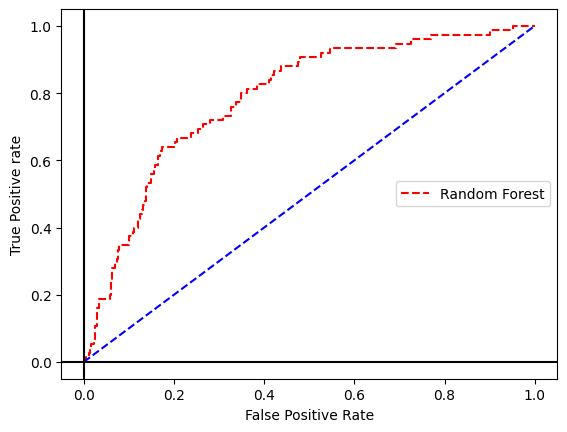

In [20]:
plt.axes(facecolor='white')
# plot roc curves

plt.plot(fpr, tpr, linestyle='--',color='red',label='Random Forest') #label='Random Forest'
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.grid(False)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

#ax = fig.add_axes([1,1,0,0])

#ax.set_facecolor("white")

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



In [21]:
from sklearn import tree

In [23]:
fn=X_train.columns
cn=['Survival','Death']

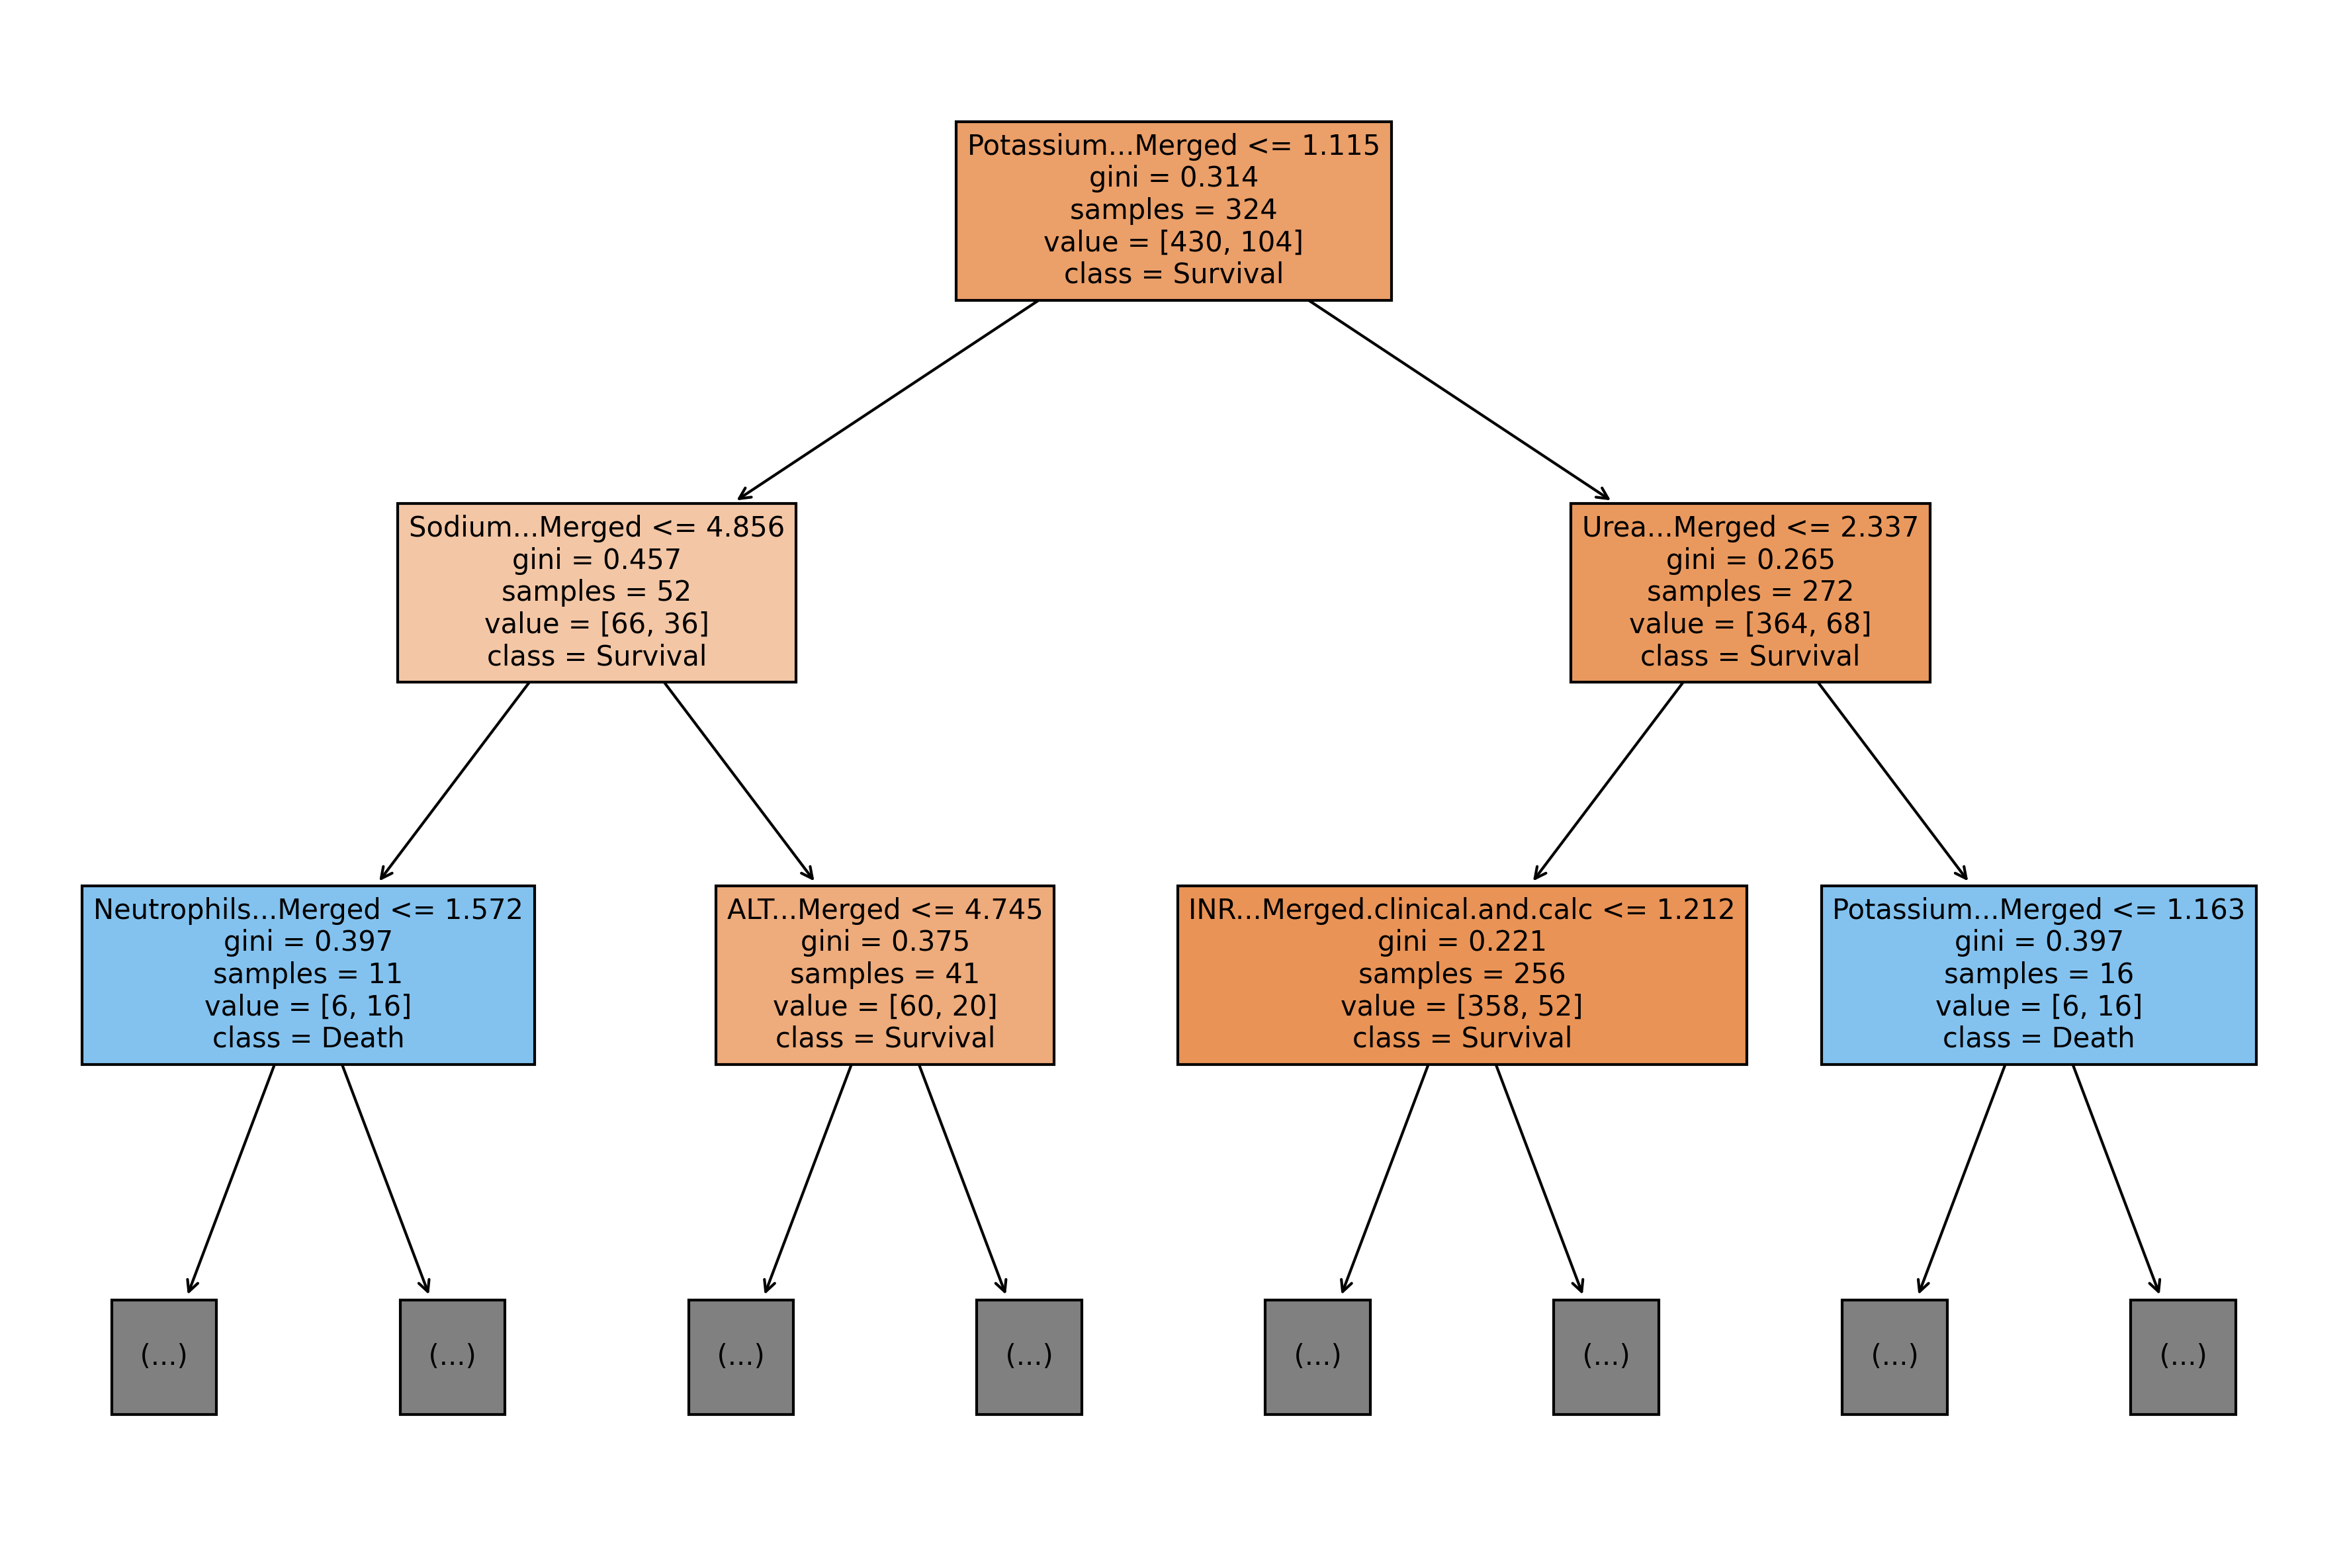

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)




tree.plot_tree(rf.estimators_[4],
               feature_names = fn, 
               class_names=cn,
               max_depth =2,
               filled = True, fontsize=10);
plt.savefig('/home/jlm217/rds/rds-mrc-bsu-csoP2nj6Y6Y/mimah/stopah/lili/rf_individualtree.png',dpi=300)

